# Part 2. Getting Started- Load Python Packages

In [1]:
!pip install git+https://github.com/AI4Finance-LLC/FinRL-Library.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/AI4Finance-LLC/FinRL-Library.git to /tmp/pip-req-build-unh7rih1
  Running command git clone -q https://github.com/AI4Finance-LLC/FinRL-Library.git /tmp/pip-req-build-unh7rih1
  Cloning https://github.com/quantopian/pyfolio.git to /tmp/pip-install-17q591je/pyfolio_8dc82929f9134e4b8d49f337102b3473
  Running command git clone -q https://github.com/quantopian/pyfolio.git /tmp/pip-install-17q591je/pyfolio_8dc82929f9134e4b8d49f337102b3473
  Cloning https://github.com/AI4Finance-Foundation/ElegantRL.git to /tmp/pip-install-17q591je/elegantrl_df531b12525045789fe3f134900e7dfd
  Running command git clone -q https://github.com/AI4Finance-Foundation/ElegantRL.git /tmp/pip-install-17q591je/elegantrl_df531b12525045789fe3f134900e7dfd
     |████████████████████████████████| 2.3 MB 11.1 MB/s 
     |████████████████████████████████| 234 kB 93.6 MB/s 
     |█████████████████████

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
import datetime

%matplotlib inline
from finrl import config
from finrl import config_tickers
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
#from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv
#from finrl.agents.stablebaselines3.models import DRLAgent,DRLEnsembleAgent
from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline

from pprint import pprint

import sys
sys.path.append("../FinRL-Library")

import itertools

In [4]:
from env_backup import StockTradingEnv

In [5]:
from model_with_unify_env import DRLAgent,DRLEnsembleAgent

In [6]:
import os
if not os.path.exists("./" + config.DATA_SAVE_DIR):
    os.makedirs("./" + config.DATA_SAVE_DIR)
if not os.path.exists("./" + config.TRAINED_MODEL_DIR):
    os.makedirs("./" + config.TRAINED_MODEL_DIR)
if not os.path.exists("./" + config.TENSORBOARD_LOG_DIR):
    os.makedirs("./" + config.TENSORBOARD_LOG_DIR)
if not os.path.exists("./" + config.RESULTS_DIR):
    os.makedirs("./" + config.RESULTS_DIR)

# Part 3. Download Data

In [7]:
print(config_tickers.DOW_30_TICKER)

['AXP', 'AMGN', 'AAPL', 'BA', 'CAT', 'CSCO', 'CVX', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'KO', 'JPM', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PG', 'TRV', 'UNH', 'CRM', 'VZ', 'V', 'WBA', 'WMT', 'DIS', 'DOW']


In [8]:
df = YahooDownloader(start_date = '2006-04-01',
                     end_date = '2022-06-01',
                     ticker_list = config_tickers.DOW_30_TICKER).fetch_data()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [9]:
df.head()

,date,open,high,low,close,volume,tic,day
0,2006-04-03,2.273929,2.290000,2.236071,1.910449,815791200,AAPL,0
1,2006-04-03,73.459999,73.500000,71.680000,54.252708,10609400,AMGN,0
2,2006-04-03,52.810001,53.099998,52.349998,40.552982,4105800,AXP,0
3,2006-04-03,78.250000,79.129997,78.010002,55.739616,3303500,BA,0
4,2006-04-03,72.709999,75.480003,72.559998,47.309883,5884900,CAT,0


In [10]:
df.tail()

,date,open,high,low,close,volume,tic,day
118310,2022-05-31,503.619995,504.109985,495.660004,493.466309,4003100,UNH,1
118311,2022-05-31,210.380005,214.350006,209.110001,211.794876,9586400,V,1
118312,2022-05-31,51.259998,51.560001,50.849998,50.652733,25016600,VZ,1
118313,2022-05-31,43.480000,44.270000,43.049999,43.315239,8192000,WBA,1
118314,2022-05-31,127.459999,129.899994,127.419998,128.072220,12304100,WMT,1


In [11]:
df.shape

(118315, 8)

In [12]:
df.sort_values(['date','tic']).head()

,date,open,high,low,close,volume,tic,day
0,2006-04-03,2.273929,2.290000,2.236071,1.910449,815791200,AAPL,0
1,2006-04-03,73.459999,73.500000,71.680000,54.252708,10609400,AMGN,0
2,2006-04-03,52.810001,53.099998,52.349998,40.552982,4105800,AXP,0
3,2006-04-03,78.250000,79.129997,78.010002,55.739616,3303500,BA,0
4,2006-04-03,72.709999,75.480003,72.559998,47.309883,5884900,CAT,0


In [13]:
len(df.tic.unique())

30

In [14]:
df.tic.value_counts()

AAPL    4069
AMGN    4069
WMT     4069
WBA     4069
VZ      4069
UNH     4069
TRV     4069
PG      4069
NKE     4069
MSFT    4069
MRK     4069
MMM     4069
MCD     4069
KO      4069
JPM     4069
JNJ     4069
INTC    4069
IBM     4069
HON     4069
HD      4069
GS      4069
DIS     4069
CVX     4069
CSCO    4069
CRM     4069
CAT     4069
BA      4069
AXP     4069
V       3576
DOW      807
Name: tic, dtype: int64

# Part 4: Preprocess Data

In [15]:
tech_indicators = ['macd',
 'rsi_30',
 'cci_30',
 'dx_30']

In [16]:
fe = FeatureEngineer(
                    use_technical_indicator=True,
                    tech_indicator_list = tech_indicators,
                    use_turbulence=True,
                    user_defined_feature = False)

processed = fe.preprocess_data(df)
processed = processed.copy()
processed = processed.fillna(0)
processed = processed.replace(np.inf,0)

Successfully added technical indicators
Successfully added turbulence index


In [17]:
processed.sample(5)

,date,open,high,low,close,volume,tic,day,macd,rsi_30,cci_30,dx_30,turbulence
78859,2017-06-09,128.029663,128.508881,127.425835,115.328453,2422768,HON,4,1.035722,65.113189,108.944182,29.373981,61.476227
98246,2020-03-11,117.599998,118.440002,110.680000,105.011055,16456000,PG,2,-1.867733,40.343841,-173.652349,29.944404,170.232739
81202,2017-10-09,91.589996,91.959999,91.500000,85.715935,1653700,AXP,0,1.412505,69.632127,130.205982,48.068090,32.894555
47623,2013-01-03,72.800003,73.599998,72.519997,58.524330,2124800,TRV,3,0.328717,58.822046,49.015567,14.768329,39.050671
85389,2018-05-14,165.649994,165.979996,164.320007,148.099182,2537300,MCD,0,1.198263,53.065947,96.198112,15.862960,24.657544


# Part 5. Design Environment

In [18]:
stock_dimension = len(processed.tic.unique())
state_space = 1 + 2*stock_dimension + len(tech_indicators)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 28, State Space: 169


In [19]:
env_kwargs = {
    "hmax": 100, 
    "initial_amount": 1000000, 
    "buy_cost_pct": 0.001, 
    "sell_cost_pct": 0.001, 
    "state_space": state_space, 
    "stock_dim": stock_dimension, 
    "tech_indicator_list": tech_indicators,
    "action_space": stock_dimension, 
    "reward_scaling": 1e-4,
    "print_verbosity":5
    
}

# Part 6: Implement DRL Algorithms

In [20]:
rebalance_window = 63 # rebalance_window is the number of days to retrain the model
validation_window = 63 # validation_window is the number of days to do validation and trading (e.g. if validation_window=63, then both validation and trading period will be 63 days)
train_start = '2006-04-01'
train_end = '2018-04-01'
val_test_start = '2018-04-01'
val_test_end = '2022-06-01'

ensemble_agent = DRLEnsembleAgent(df=processed,
                 train_period=(train_start,train_end),
                 val_test_period=(val_test_start,val_test_end),
                 rebalance_window=rebalance_window, 
                 validation_window=validation_window, 
                 **env_kwargs)

In [21]:
A2C_model_kwargs = {
                    'n_steps': 5,
                    'ent_coef': 0.01,
                    'learning_rate': 0.0005
                    }

PPO_model_kwargs = {
                    "ent_coef":0.01,
                    "n_steps": 2048,
                    "learning_rate": 0.00025,
                    "batch_size": 64
                    }

DDPG_model_kwargs = {
                      #"action_noise":"ornstein_uhlenbeck",
                      "buffer_size": 10_000,
                      "learning_rate": 0.0005,
                      "batch_size": 64
                    }

timesteps_dict = {'a2c' : 10_000, 
                 'ppo' : 10_000, 
                 'ddpg' : 10_000
                 }

In [22]:
df_summary = ensemble_agent.run_ensemble_strategy(A2C_model_kwargs,
                                                 PPO_model_kwargs,
                                                 DDPG_model_kwargs,
                                                 timesteps_dict)

============Start Ensemble Strategy============
turbulence_threshold:  193.5412209396939
======Model training from:  2006-04-01 to  2018-04-02
======PPO Training========
{'ent_coef': 0.01, 'n_steps': 2048, 'learning_rate': 0.00025, 'batch_size': 64}
Using cuda device
Logging to tensorboard_log/ppo/ppo_126_1
----------------------------------
| time/              |           |
|    fps             | 78        |
|    iterations      | 1         |
|    time_elapsed    | 26        |
|    total_timesteps | 2048      |
| train/             |           |
|    reward          | 0.7711783 |
----------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 86          |
|    iterations           | 2           |
|    time_elapsed         | 47          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.018392486 |
|    clip_fraction        | 0.251       

In [23]:
df_summary

,Iter,Val Start,Val End,Model Used,PPO Sharpe,DDPG Sharpe,PPO REVERSE Sharpe,DDPG REVERSE Sharpe
0,126,2018-04-02,2018-06-29,PPO,0.069091,0.036903,-0.062311,0.059601
1,189,2018-06-29,2018-09-28,DDPG,0.190125,0.473481,0.094998,0.343871
2,252,2018-09-28,2018-12-31,DDPG with reverse action space,-0.249112,-0.261673,-0.143318,-0.082613
3,315,2018-12-31,2019-04-02,DDPG,0.132805,0.417597,0.132332,0.166169
4,378,2019-04-02,2019-07-02,DDPG,0.068181,0.108851,0.026189,0.009027
5,441,2019-07-02,2019-10-01,PPO with reverse action space,0.028716,-0.046463,0.060904,0.019203
6,504,2019-10-01,2019-12-31,PPO,0.501572,0.475506,0.127626,0.205668
7,567,2019-12-31,2020-04-01,PPO with reverse action space,-0.421524,-0.478678,-0.084814,-0.142363
8,630,2020-04-01,2020-07-01,DDPG,0.190901,0.25846,0.042284,0.125785
9,693,2020-07-01,2020-09-30,PPO,0.181781,0.128413,-0.027534,0.10334


# Part 7: Backtest Our Strategy

In [24]:
unique_trade_date = processed[(processed.date > val_test_start)&(processed.date <= val_test_end)].date.unique()

In [25]:
df_trade_date = pd.DataFrame({'datadate':unique_trade_date})

df_account_value=pd.DataFrame()
for i in range(rebalance_window+validation_window, len(unique_trade_date)+1,rebalance_window):
    temp = pd.read_csv('results/account_value_trade_{}_{}.csv'.format('ensemble',i))


    df_account_value = df_account_value.append(temp,ignore_index=True)
sharpe=(252**0.5)*df_account_value.account_value.pct_change(1).mean()/df_account_value.account_value.pct_change(1).std()
print('Sharpe Ratio: ',sharpe)
df_account_value=df_account_value.join(df_trade_date[validation_window:].reset_index(drop=True))

Sharpe Ratio:  0.33930566440472826


In [26]:
print(df_account_value)


     account_value        date  daily_return    datadate
0     1.000000e+06  2018-06-29           NaN  2018-06-29
1     1.000213e+06  2018-07-02      0.000213  2018-07-02
2     9.994168e+05  2018-07-03     -0.000796  2018-07-03
3     1.000589e+06  2018-07-05      0.001173  2018-07-05
4     1.001822e+06  2018-07-06      0.001232  2018-07-06
..             ...         ...           ...         ...
940   1.179843e+06  2022-03-24      0.012585  2022-03-24
941   1.182655e+06  2022-03-25      0.002383  2022-03-25
942   1.184649e+06  2022-03-28      0.001686  2022-03-28
943   1.198772e+06  2022-03-29      0.011922  2022-03-29
944   1.195003e+06  2022-03-30     -0.003144  2022-03-30

[945 rows x 4 columns]


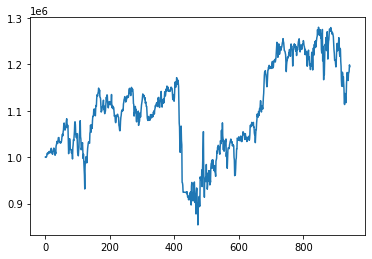

In [27]:
%matplotlib inline
df_account_value.account_value.plot()

# 7.1 BackTestStats

In [28]:
print("==============Get Backtest Results===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value)
perf_stats_all = pd.DataFrame(perf_stats_all)

==============Get Backtest Results===========
Annual return          0.048653
Cumulative returns     0.195003
Annual volatility      0.198178
Sharpe ratio           0.339306
Calmar ratio           0.179589
Stability              0.275597
Max drawdown          -0.270913
Omega ratio            1.066847
Sortino ratio          0.473145
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.884651
Daily value at risk   -0.024701
dtype: float64


In [29]:
#baseline stats
print("==============Get Baseline Stats===========")
baseline_df = get_baseline(
        ticker="^DJI", 
        start = df_account_value.loc[0,'date'],
        end = df_account_value.loc[len(df_account_value)-1,'date'])

stats = backtest_stats(baseline_df, value_col_name = 'close')

==============Get Baseline Stats===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (944, 8)
Annual return          0.105117
Cumulative returns     0.454147
Annual volatility      0.224747
Sharpe ratio           0.558355
Calmar ratio           0.283439
Stability              0.709295
Max drawdown          -0.370862
Omega ratio            1.124677
Sortino ratio          0.771926
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.888473
Daily value at risk   -0.027818
dtype: float64


# 7.2 BackTestPlot

==============Compare to DJIA===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (944, 8)


Start date,2018-06-29
End date,2022-03-30
Total months,45
,Backtest
Annual return,4.865%
Cumulative returns,19.5%
Annual volatility,19.818%
Sharpe ratio,0.34
Calmar ratio,0.18
Stability,0.28
Max drawdown,-27.091%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,27.09,2020-02-12,2020-05-18,2021-03-12,283
1,13.98,2018-10-03,2018-12-24,2019-01-31,87
2,13.01,2021-11-09,2022-03-08,NaT,NaN
3,8.01,2019-02-27,2019-06-03,2019-07-24,106
4,7.11,2019-07-24,2019-08-23,2019-12-30,114


Stress Events,mean,min,max
New Normal,0.03%,-8.29%,7.08%


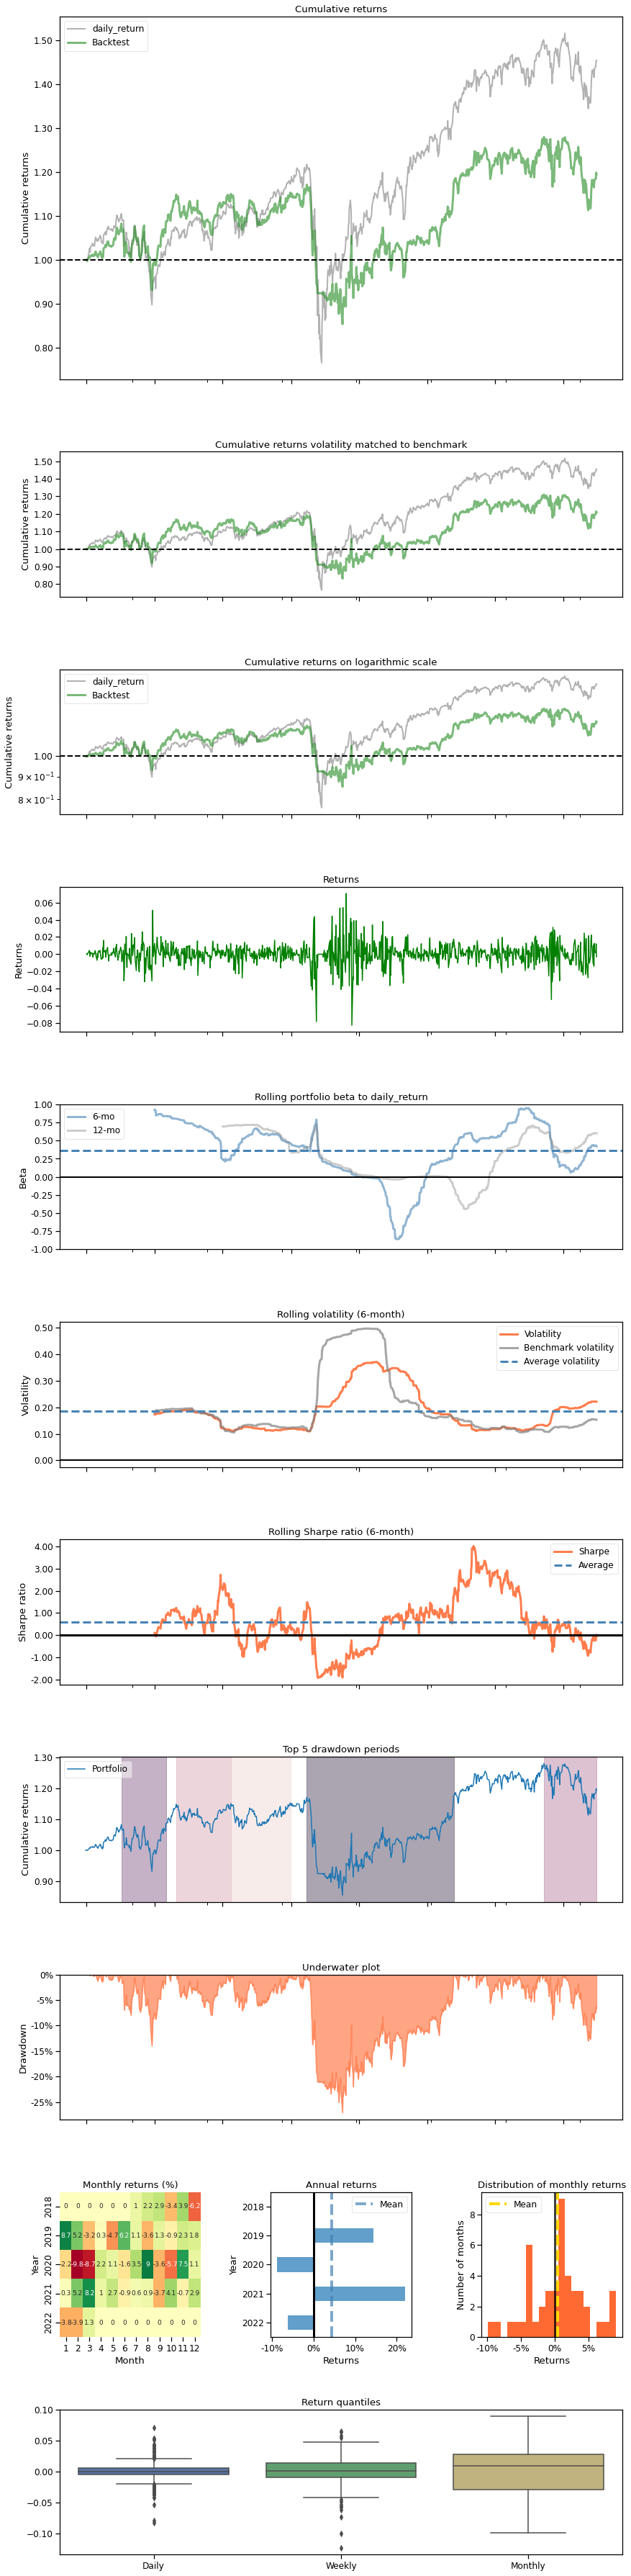

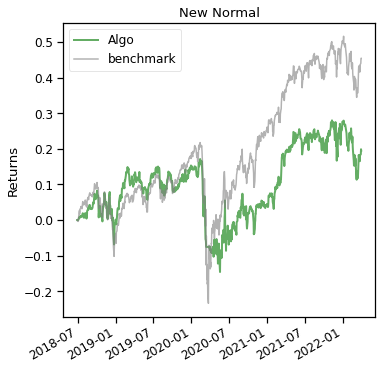

In [30]:
print("==============Compare to DJIA===========")
%matplotlib inline
# S&P 500: ^GSPC
# Dow Jones Index: ^DJI
# NASDAQ 100: ^NDX
backtest_plot(df_account_value, 
             baseline_ticker = '^DJI', 
             baseline_start = df_account_value.loc[0,'date'],
             baseline_end = df_account_value.loc[len(df_account_value)-1,'date'])